In [2]:
# ###################################
# Group ID : 741
# Members : Simon Loi Baks, Vasiliki Ismiroglou
# Date : 27/09/2023
# Lecture: Lecture 5 Clustering
# Dependencies: scipy.io.loadmat, scipy.stats.multivariate_normal, numpy, matplotlib, sklearn.mixture.GaussianMixture
# Python version:3.11.4
# Functionality: Clustering 2D data using a gaussian mixture
# ###################################

In [3]:
from scipy.io import loadmat
import numpy as np
from scipy.stats import multivariate_normal as norm
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM

## Loading the data and mixing
First we load the exercise data set, combine the individual training sets into one and shuffle the data to ensure a random shuffle (here with a seed to ensure reproducability). 

In [4]:
data_path = "Data/2D568class.mat"
data = loadmat(data_path)
train5 = data["trn5_2dim"]/255
train6 = data["trn6_2dim"]/255
train8 = data["trn8_2dim"]/255

trainset = np.concatenate([train5, train6, train8])
np.random.seed(0)
np.random.shuffle(trainset)

## Creating a Gaussian Mixture model

In [5]:
gm = GMM(n_components=3, random_state=0).fit(trainset)

## Creating Gaussian models

In [6]:
mean5 = np.mean(train5, axis = 0)
mean6 = np.mean(train6, axis = 0)
mean8 = np.mean(train8, axis = 0)

cov5 = np.cov(train5, rowvar=False)
cov6 = np.cov(train6, rowvar=False)
cov8 = np.cov(train8, rowvar=False)

g5 = norm(mean5, cov5)
g6 = norm(mean6, cov6)
g8 = norm(mean8, cov8)

## Comparing means and covariance matrices.

In [7]:
gm_means = gm.means_
mean1_gmm = gm_means[0]
mean2_gmm = gm_means[1]
mean3_gmm = gm_means[2]

gm_cov = gm.covariances_
cov1_gmm = gm_cov[0]
cov2_gmm = gm_cov[1]
cov3_gmm = gm_cov[2]

### Means

In [8]:
for name, mean in {"mean5": mean5, "mean6": mean6, "mean8": mean8, 
                   "mean1_gmm": mean1_gmm, "mean2_gmm": mean2_gmm, "mean3_gmm": mean3_gmm}.items():
    print(f"{name}: {np.array2string(mean)}")

mean5: [-1.09629628 -0.35037072]
mean6: [2.60384024 0.86074213]
mean8: [-1.61901038 -0.54586145]
mean1_gmm: [3.10726354 0.52307774]
mean2_gmm: [-1.43860167  1.61351073]
mean3_gmm: [-1.00256296 -2.06294658]


### Covariances

Text(0.5, 1.0, 'Cov. GMM kernel 3')

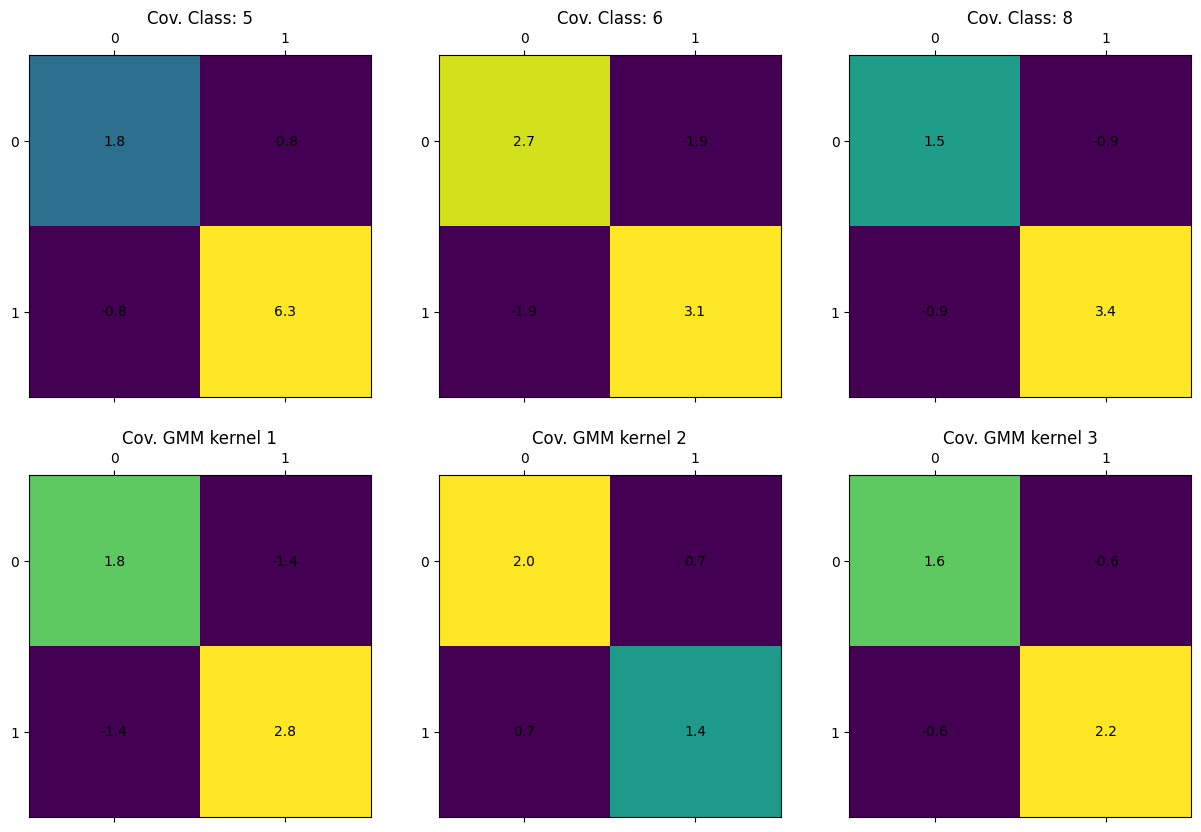

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].matshow(cov5)
for (i, j), z in np.ndenumerate(cov5):
    axs[0, 0].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[0, 0].set_title("Cov. Class: 5")

axs[1, 0].matshow(cov1_gmm)
for (i, j), z in np.ndenumerate(cov1_gmm):
    axs[1, 0].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[1, 0].set_title("Cov. GMM kernel 1")

axs[0, 1].matshow(cov6)
for (i, j), z in np.ndenumerate(cov6):
    axs[0, 1].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[0, 1].set_title("Cov. Class: 6")

axs[1, 1].matshow(cov2_gmm)
for (i, j), z in np.ndenumerate(cov2_gmm):
    axs[1, 1].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[1, 1].set_title("Cov. GMM kernel 2")

axs[0, 2].matshow(cov8)
for (i, j), z in np.ndenumerate(cov8):
    axs[0, 2].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[0, 2].set_title("Cov. Class: 8")

c = axs[1, 2].matshow(cov1_gmm)
for (i, j), z in np.ndenumerate(cov3_gmm):
    axs[1, 2].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[1, 2].set_title("Cov. GMM kernel 3")

## Visualizing the models in contourplots.

We first generate some points to be able to sample from the models.

In [10]:
X = np.linspace(-8, 8, 100)
Y = np.linspace(-8, 8, 100)
X, Y = np.meshgrid(X, Y)

XX = np.array([X.ravel(), Y.ravel()]).T

We can also visualize the separate Gaussian models from the GMM by creating Gassians from the classwise means and covariances of the GMM model.

In [11]:
gmm_gauss1 = norm(mean1_gmm, cov1_gmm)
gmm_gauss2 = norm(mean2_gmm, cov2_gmm)
gmm_gauss3 = norm(mean3_gmm, cov3_gmm)

Now we sample from the models using the generated points.

In [12]:
Z_gaussmix = np.exp(gm.score_samples(XX)).reshape(X.shape)

Z_sepgauss1 = gmm_gauss1.pdf(XX).reshape(X.shape)
Z_sepgauss2 = gmm_gauss2.pdf(XX).reshape(X.shape)
Z_sepgauss3 = gmm_gauss3.pdf(XX).reshape(X.shape)

Z_train5 = g5.pdf(XX).reshape(X.shape)
Z_train6 = g6.pdf(XX).reshape(X.shape)
Z_train8 = g8.pdf(XX).reshape(X.shape)

The model samples can then be visualized in a contour plot.

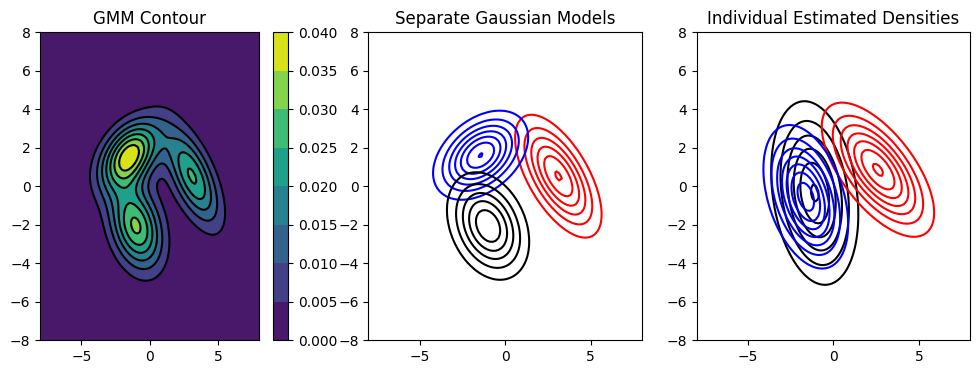

In [24]:
# Create contour plots
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.title('GMM Contour')
gmm_contour = plt.contourf(X, Y, Z_gaussmix)
contour_lines = plt.contour(X, Y, Z_gaussmix, colors='black')
plt.colorbar(gmm_contour)

plt.subplot(132)
plt.title('Separate Gaussian Models')
plt.contour(X, Y, Z_sepgauss1, colors='red')
plt.contour(X, Y, Z_sepgauss2, colors='blue')
plt.contour(X, Y, Z_sepgauss3, colors='black')

plt.subplot(133)
plt.title('Individual Estimated Densities')
tr5 = plt.contour(X, Y, Z_train5, colors='black')
tr6 = plt.contour(X, Y, Z_train6, colors='red')
tr8 = plt.contour(X, Y, Z_train8, colors='blue')
plt.show()

